In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading data as df
url = "https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/mobile_price.csv"
df = pd.read_csv(url)
df

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


# **Machine Learning Model Building Steps:-**

# 1. Explore the Dataset:

1.1 Understand the Data: Begin by getting an overview of the dataset. Check the type and amount of data available, and understand the structure of the dataset.

In [ ]:
df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [ ]:
df.tail()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.0,12.0,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.0,20.0,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.0,20.0,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.0,20.0,8.0,3400,7.9
160,1131,2536,9807,202.0,6.00,367,8,1.500,16.0,3.0,21.5,16.0,2700,8.4


In [ ]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [ ]:
df.shape

(161, 14)

In [ ]:
df.dtypes

,0
Product_id,int64
Price,int64
Sale,int64
weight,float64
resoloution,float64
ppi,int64
cpu core,int64
cpu freq,float64
internal mem,float64
ram,float64


In [ ]:
# check missing values
df.isnull().sum()

,0
Product_id,0
Price,0
Sale,0
weight,0
resoloution,0
ppi,0
cpu core,0
cpu freq,0
internal mem,0
ram,0


In [ ]:
# check duplicates
print(df.duplicated().sum())

0


1.2 **Examine Statistical Summary:** Look at basic statistics of the dataset to understand the distribution of features.

In [ ]:
df.describe() # Statistical Summary

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


1.3 Correlation Analysis: Create a heatmap to visualize the correlation matrix. Focus on the relationship between the features and the target variable 'Price'.

In [ ]:
# correlation matrix
correlation_matrix = df.corr()
correlation_matrix

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
Product_id,1.000000,0.165136,0.218548,0.035869,-0.017817,0.207271,-0.008634,0.092428,0.261186,0.236194,0.172812,0.071020,0.031745,0.039807
Price,0.165136,1.000000,0.273263,0.144555,0.404010,0.817614,0.686811,0.727383,0.776738,0.896915,0.739538,0.675286,0.559946,-0.716773
Sale,0.218548,0.273263,1.000000,0.016114,0.017154,0.235896,0.069517,0.099133,0.489308,0.373127,0.292164,0.437233,0.120338,-0.047991
weight,0.035869,0.144555,0.016114,1.000000,0.890416,-0.054683,0.216257,0.222730,0.098849,0.149283,-0.029448,-0.005971,0.833783,-0.185262
resoloution,-0.017817,0.404010,0.017154,0.890416,1.000000,0.181292,0.472226,0.505454,0.202660,0.327216,0.249892,0.202720,0.843462,-0.533708
ppi,0.207271,0.817614,0.235896,-0.054683,0.181292,1.000000,0.487990,0.713168,0.618560,0.748724,0.774008,0.491371,0.302517,-0.496791
cpu core,-0.008634,0.686811,0.069517,0.216257,0.472226,0.487990,1.000000,0.491519,0.276251,0.483128,0.611353,0.586698,0.459728,-0.697935
cpu freq,0.092428,0.727383,0.099133,0.222730,0.505454,0.713168,0.491519,1.000000,0.441400,0.633547,0.625104,0.358319,0.473137,-0.614458
internal mem,0.261186,0.776738,0.489308,0.098849,0.202660,0.618560,0.276251,0.441400,1.000000,0.875354,0.451917,0.555733,0.461506,-0.367412
ram,0.236194,0.896915,0.373127,0.149283,0.327216,0.748724,0.483128,0.633547,0.875354,1.000000,0.648073,0.647470,0.541001,-0.521074


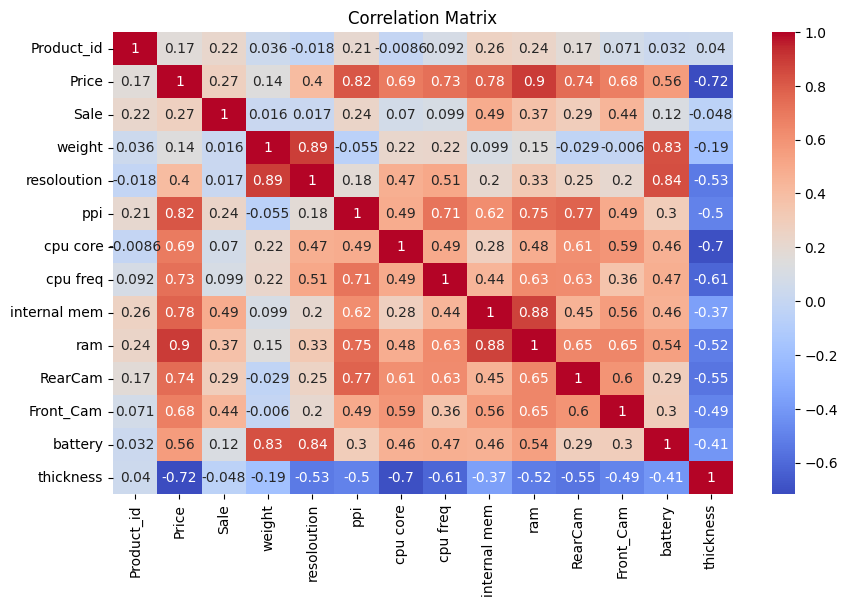

In [ ]:
# ploting heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data =correlation_matrix , annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

1.4 Relationship Analysis: Identify the top 4 features that show the highest correlation with the target variable 'Price'. For each of these features, plot a scatter plot to observe how well each feature correlates with 'Price'. Display all four scatter plots side by side in a single figure.

In [ ]:
# sort the top 4 features using correlation_matrix
top_4_features = correlation_matrix['Price'].abs().sort_values(ascending=False)[1:5]
top_4_features

,Price
ram,0.896915
ppi,0.817614
internal mem,0.776738
RearCam,0.739538


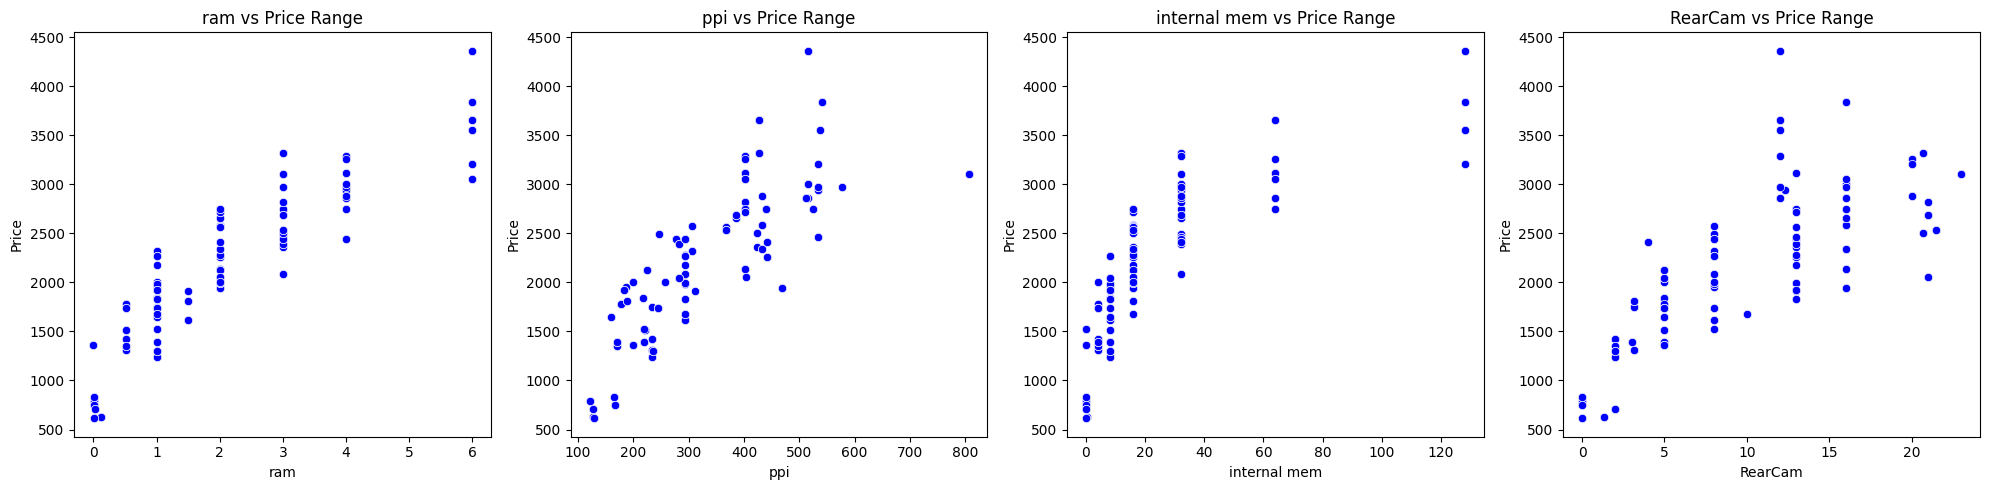

In [ ]:
# scatter plot by subplot
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, feature in enumerate(top_4_features.index):
  sns.scatterplot(x=df[feature], y=df['Price'], ax=axes[i], color='blue')
  plt.sca(axes[i])
  plt.title(f"{feature} vs Price Range", fontsize=12)
plt.tight_layout()
plt.show()

#2. Prepare the Data:

2.1 Feature Selection: Select the features and the target variable for your analysis.



In [ ]:
# select x and y
x = df.drop('Price', axis=1)
y = df['Price'] # target variable

2.2 Split the Dataset: Divide the dataset into training and testing sets. Use 80% of the data for training and 20% for testing.

In [ ]:
# import libraries
from sklearn.model_selection import train_test_split
# Divide the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)

(128, 13)
(33, 13)


#3. Build and Train the Model:

3.1 Create a Linear Regression Model: Build a linear regression model using the training data.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# Create a Linear Regression Model
model = LinearRegression()
model

LinearRegression()

3.2 Train the Model: Fit the model to the training data.

In [ ]:
# train the model
model.fit(x_train, y_train)


LinearRegression()

#4. Evaluate the Model:

4.1 Predict: Use the model to make predictions on the test set.

In [ ]:
# predictions
y_pred = model.predict(x_test)
y_pred

array([ 907.80419127, 1877.9636331 , 2615.30858191, 1531.29042803,
       1628.46951911, 1841.79162954,  908.02365625, 1319.97917421,
       2376.41443955, 2614.32098949, 1396.95346226, 1578.36876314,
       1784.47837742, 2873.44966804, 2196.11020964, 2175.34837587,
       2505.88579707, 3030.24748854, 1438.29688599, 2175.5129746 ,
       2305.10630183, 1784.44179992, 1925.7379722 , 2448.59069863,
       3108.92426374, 4103.16436544, 2476.31963034, 3428.65699478,
       2662.00019022, 2487.87426595, 3091.30292846, 2598.27957866,
       2568.4877093 ])

4.2 Metrics Calculation: Evaluate the model’s performance using the following metrics:
- Slope (Coefficient) and Intercept: Print the slope (coefficient) and intercept of the regression line.


In [ ]:
# parameters
print(f"Slope (Coefficient): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

Slope (Coefficient): 0.05380732844154395
Intercept: 1629.0911226213616


- Model Performance Metrics: Calculate and report the following metrics:
 - R² Score: How well does the model explain the variance in the target variable?


In [ ]:
print(f"R-squared: {r2_score(y_test, y_pred):.2f}")
# r2_score refer the regression line fits the data
# in mobile price dataset r²(0.96) is near to 1
# it means all data points are near the line

R-squared: 0.96


  - - Mean Absolute Error (MAE): What is the average absolute difference between predicted and actual values?


In [ ]:
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
# MAE is used to calculate the differs
# from actual price to predicted price
# differs are 130.32

Mean Absolute Error: 130.32


 - - Mean Squared Error (MSE): What is the average of the squared differences between predicted and actual values?

In [ ]:
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
# MSE calculate the squared differences between av and pv
# to avoid -ve values = square the mean error values

Mean Squared Error: 23062.23


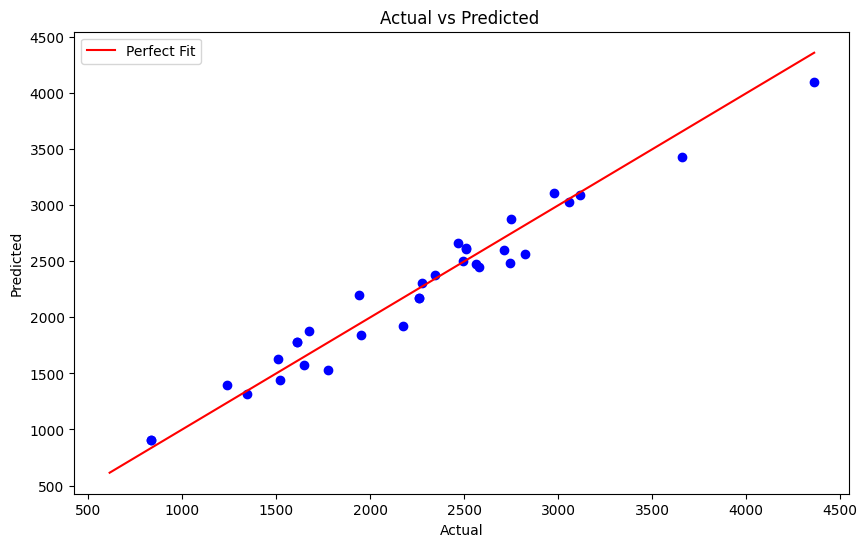

In [ ]:
# scatter plot for predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', label='Perfect Fit')
plt.title("Actual vs Predicted ")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.show()

#5. Conclude the Analysis:

5.1 Model Evaluation: Based on the performance metrics, assess how well the model predicts mobile prices. Discuss whether the model’s performance is satisfactory or if there are areas for improvement.



In [ ]:
# the model perform very well it gives 0.96 r² out off 1 value but has some errors

5.2 Insights and Discussion:
  - What insights did you gain from the correlation analysis and scatter plots?



In [ ]:
top_4_features
# if you increasse a this 4 features means mobile price also increase

,Price
ram,0.896915
ppi,0.817614
internal mem,0.776738
RearCam,0.739538


  - How do the selected features contribute to the prediction of mobile prices?


In [ ]:
# ram , ppi , internal memory  and rear camera are highest impact on price
# and this 4 features help the model predict price accurately
# so mainly focus on this top 4 features means it increase a mobile price

  - What do the slope (coefficient) and intercept reveal about the relationship between the features and the target variable?


In [ ]:
# it show the how much price increase in a feature

  - How well does the model perform based on the evaluation metrics? Are there any discrepancies between the predicted and actual values?


In [ ]:
# the model predicts well but some predicted price differ from actual price

  - What might be some potential improvements or additional steps you could take to enhance the model’s performance?

In [ ]:
# some improvement are remove less usefull features  in mobile
# or use advanced model to get better accuracy and reduce errors